Zero-Shot Prediction

In [38]:
import os
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR100

In [39]:
# 모델 호출
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device = device)

In [40]:
print(os.path.abspath("CLIP_0722.ipynb"))

/home/ghdrnjs/project/CLIP_0722.ipynb


In [41]:
cifar100 = CIFAR100(root=os.path.expanduser("~/.cache"), download=True, train=False)

Files already downloaded and verified


In [42]:
cifar100

Dataset CIFAR100
    Number of datapoints: 10000
    Root location: /home/ghdrnjs/.cache
    Split: Test

In [43]:
len(cifar100.classes)

100

In [44]:
# 모델과 데이터를 불러왔으니 이제 모델에 입력하기 위한 input data를 세팅
image, class_id = cifar100[8121]
print(image, class_id)

<PIL.Image.Image image mode=RGB size=32x32 at 0x7F76A83B72B0> 84


Text(0.5, 1.0, 'Class : 84')

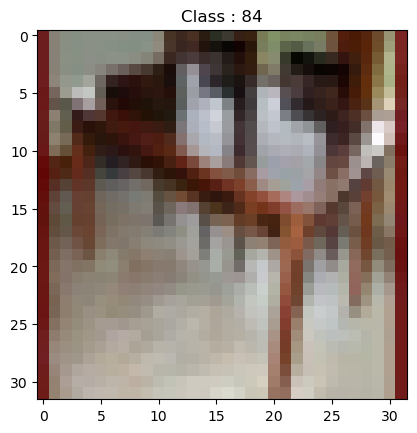

In [45]:
plt.imshow(image)
plt.title(f"Class : {class_id}")

In [54]:
image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in cifar100.classes]).to(device)

# Calculate features
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

# Pick the top 5 most similar labels for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

# Print the result
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{cifar100.classes[index]:>16s}: {100 * value.item():.2f}%")


Top predictions:

           table: 64.16%
           chair: 25.12%
        wardrobe: 1.25%
            lamp: 1.09%
           couch: 0.99%
